In [29]:
import numpy as np
import pandas as pd
from time import time
import scipy.stats as st

import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# data Read
data = pd.read_csv('winequality-red.csv')

In [23]:
data.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [25]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [26]:
#相關分析
data.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

In [27]:
data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

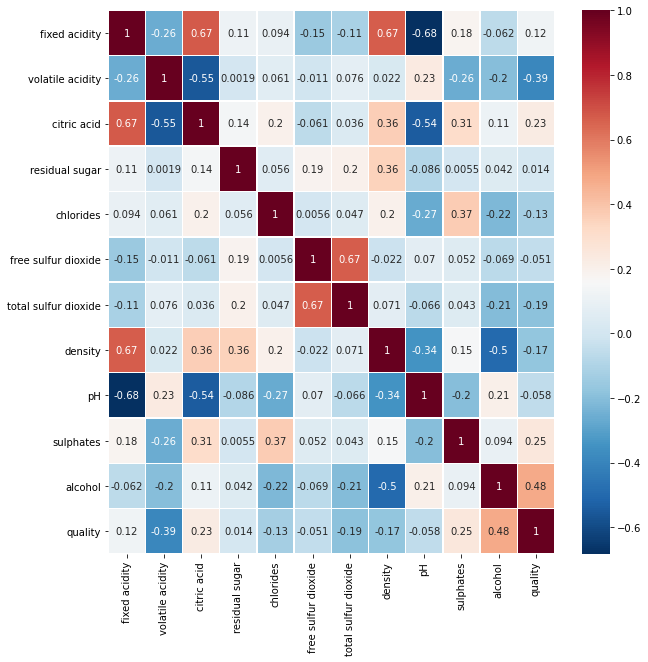

In [31]:
# Seaborn Heatmap, cmap param = Blues, Greys, OrRd, RdBu_r, Reds
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap='RdBu_r', annot=True, linewidths=0.5)

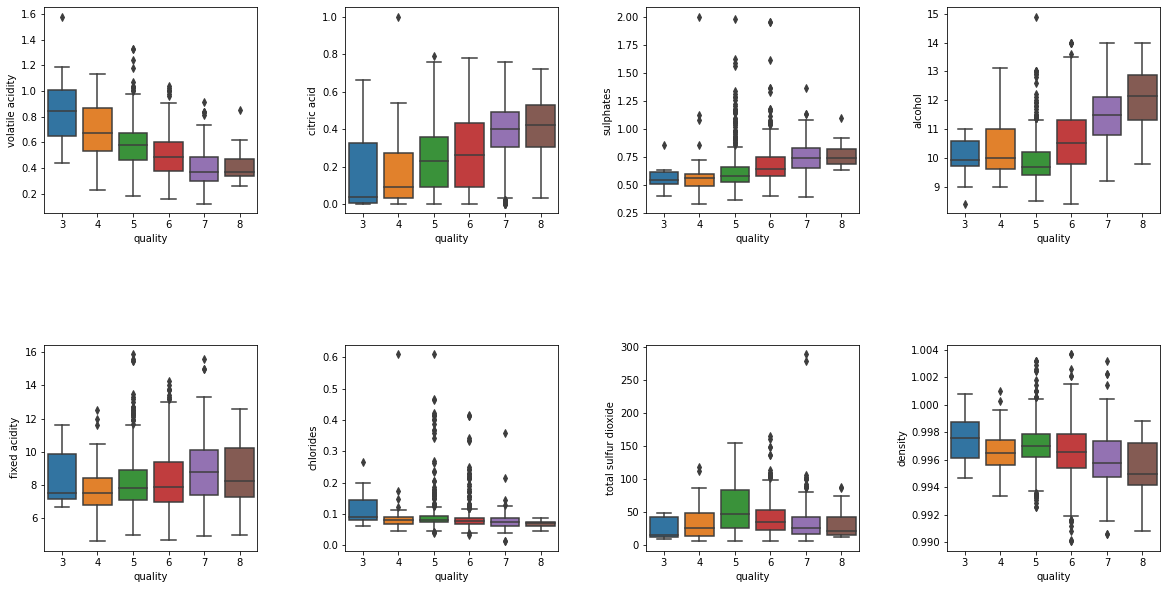

In [32]:
fig, axs = plt.subplots(2, 4, figsize = (20,10)) 
ax1 = plt.subplot2grid((5,15), (0,0), rowspan=2, colspan=3) 
ax2 = plt.subplot2grid((5,15), (0,4), rowspan=2, colspan=3)
ax3 = plt.subplot2grid((5,15), (0,8), rowspan=2, colspan=3)
ax4 = plt.subplot2grid((5,15), (0,12), rowspan=2, colspan=3)

ax5 = plt.subplot2grid((5,15), (3,0), rowspan=2, colspan=3) 
ax6 = plt.subplot2grid((5,15), (3,4), rowspan=2, colspan=3)
ax7 = plt.subplot2grid((5,15), (3,8), rowspan=2, colspan=3)
ax8 = plt.subplot2grid((5,15), (3,12), rowspan=3, colspan=3)

sns.boxplot(x='quality',y='volatile acidity', data = data, ax=ax1)
sns.boxplot(x='quality',y='citric acid', data = data, ax=ax2)
sns.boxplot(x='quality',y='sulphates', data = data, ax=ax3)
sns.boxplot(x='quality',y='alcohol', data = data, ax=ax4)

sns.boxplot(x='quality',y='fixed acidity', data = data, ax=ax5)
sns.boxplot(x='quality',y='chlorides', data = data, ax=ax6)
sns.boxplot(x='quality',y='total sulfur dioxide', data = data, ax=ax7)
sns.boxplot(x='quality',y='density', data = data, ax=ax8)

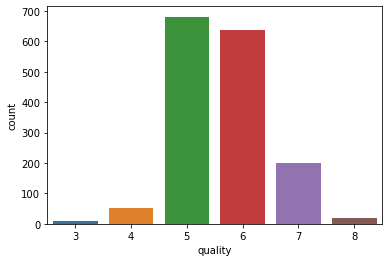

In [33]:
# See the Quality value
sns.countplot(x='quality', data=data)

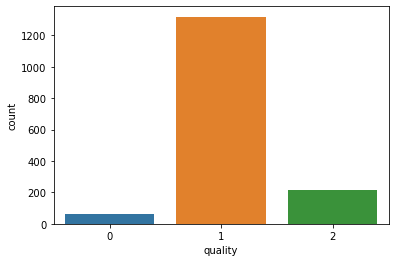

In [34]:
# Dividing Quality as bad(0), good(1), Excellent(2)
# Bad quality is 3~4 / Good quality is 5~6 / Excellent quality is 7~8
data['quality'] = pd.cut(data['quality'], bins = [1,4.5,6.5,10], labels = [0,1,2])
sns.countplot(x='quality', data=data)

In [35]:
X = data.iloc[:,:-1]
y = data['quality']

In [36]:
# Sscale standization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [37]:
# PCA - Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-1.61952988,  0.45095009, -1.77445415, ...,  0.00509804,
        -0.26775943,  0.04863012],
       [-0.79916993,  1.85655306, -0.91169017, ..., -0.52070667,
         0.06283285, -0.13814189],
       [-0.74847909,  0.88203886, -1.17139423, ..., -0.08685693,
        -0.18744237, -0.11822866],
       ...,
       [-1.45612897,  0.31174559,  1.12423941, ..., -0.80877339,
         0.24224843, -0.40291033],
       [-2.27051793,  0.97979111,  0.62796456, ..., -0.61224806,
         0.77940384,  0.04092255],
       [-0.42697475, -0.53669021,  1.6289552 , ...,  0.40430898,
         0.77943963, -0.44978056]])

In [38]:
pca_comp = PCA(n_components = 8)
X = pca_comp.fit_transform(X)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [40]:
# XGBoost / RandomizedSearchCV
import xgboost as xgb

# you should consider parma : 
# 1. booster [default=gbtree]
# 2. num_feature [default=MAX]
# 3. alpha, lambda
param = {
        'n_estimators' : 100,
        'max_depth' : 5,
        'learning_rate' : 0.1,
        'colsample_bytree' : 0.8,
        'subsample' : 0.8,
        'gamma' : 0,
        'min_child_weight' : 1
}

In [41]:
xgtrain = xgb.DMatrix(X_train, label=y_train)
xgtest = xgb.DMatrix(X_test, label=y_test)

In [42]:
num_rounds = 100
watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
xgb_model = xgb.train(param, xgtrain, num_rounds, watchlist, early_stopping_rounds=20)

[20:06:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:0.67318	test-rmse:0.64299
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 20 rounds.
[1]	train-rmse:0.62192	test-rmse:0.59720
[2]	train-rmse:0.57793	test-rmse:0.55671
[3]	train-rmse:0.54080	test-rmse:0.52367
[4]	train-rmse:0.50692	test-rmse:0.49507
[5]	train-rmse:0.47646	test-rmse:0.46841
[6]	train-rmse:0.44980	test-rmse:0.44661
[7]	train-rmse:0.42688	test-rmse:0.42943
[8]	train-rmse:0.40707	test-rmse:0.41436
[9]	train-rmse:0.38846	test-rmse:0.40084
[10]	train-rmse:0.37171	test-rmse:0.38971
[11]	train-rmse

In [43]:
y_pred = xgb_model.predict(xgtest)

In [44]:
xgb_model.attributes()

{'best_iteration': '31',
 'best_msg': '[31]\ttrain-rmse:0.24409\ttest-rmse:0.33606',
 'best_score': '0.336061'}

In [45]:
xgb_model.get_score()


{'f1': 205,
 'f2': 216,
 'f6': 139,
 'f4': 112,
 'f7': 119,
 'f0': 210,
 'f3': 132,
 'f5': 93}

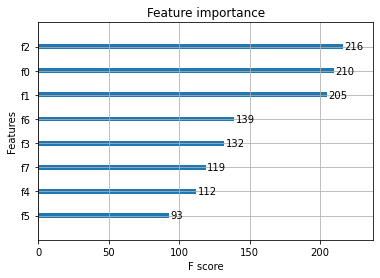

In [46]:
xgb.plot_importance(xgb_model)


In [49]:
import sklearn.metrics as metrics
predictions = [round(value) for value in y_pred]
acc =  metrics.accuracy_score(y_test, predictions)*100
print('\nAccuracy: %.2f %%\n' % acc)


Accuracy: 84.50 %



In [50]:
from sklearn import metrics
print("MAPE",metrics.mean_squared_error(y_test, y_pred))
print("RMES",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAPE 0.1143677528556205
RMES 0.3381830168054281
